### Exercise 1: Discrete Filter

In [37]:
import numpy as np
import matplotlib.pyplot as plt

def move(bel, u):
    bel_new = bel.copy()
    if u == 1:
        if len(bel) == 0:
            "invalid bel input"
        elif len(bel) == 1:
            bel_new[0] = bel[0]
        elif len(bel) == 2:
            bel_new[0] = 0.25*bel[0]
            bel_new[1] = 0.75*bel[0] + bel[1]
        else:
            bel_new[0] = 0.25*bel[0]
            bel_new[1] = 0.5*bel[0] + 0.25*bel[1]
            bel_new[-1] = 0.25 *bel[-3] + 0.75*bel[-2] + bel[-1]
            for i in range(2,len(bel)-1):
                bel_new[i] = 0.25 *bel[i-2] + 0.5*bel[i-1] + 0.25*bel[i]
    elif u == -1:
        if len(bel) == 0:
            "invalid bel input"
        elif len(bel) == 1:
            bel_new[0] = bel[0]
        elif len(bel) == 2:
            bel_new[1] = 0.25*bel[1]
            bel_new[0] = 0.75*bel[1] + bel[0]
        else:
            bel_new[-1] = 0.25*bel[-1]
            bel_new[-2] = 0.5*bel[-1] + 0.25*bel[-2]
            bel_new[0] = 0.25 *bel[2] + 0.75*bel[1] + bel[0]
            for i in range(1,len(bel)-2):
                bel_new[i] = 0.25 *bel[i+2] + 0.5*bel[i+1] + 0.25*bel[i]
    else:
        print("invalid motion input")

    return bel_new        

Right calculation
[0.00000000e+00 0.00000000e+00 0.00000000e+00 5.96046448e-08
 1.43051147e-06 1.64508820e-05 1.20639801e-04 6.33358955e-04
 2.53343582e-03 8.02254677e-03 2.06294060e-02 4.38374877e-02
 7.79333115e-02 1.20655298e-01 1.69416904e-01 2.05022573e-01
 1.88285828e-01 1.15448713e-01 4.10790443e-02 6.36351109e-03]


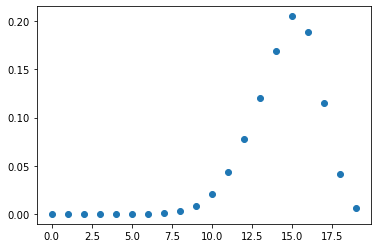

In [42]:
bel = np.zeros(20)
bel[9] = 1.0
actions = [1,1,1,1,1,1,1,1,1,-1,-1,-1]

for u in actions:
    bel = move(bel,u)

if abs(sum(bel)-1) < 1e-3:
    print("Right calculation")

print(bel)
plt.figure()
plt.plot(range(20), bel, 'o')